## Income Prediction Model

In [ ]:
# Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,  VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from scipy.stats import norm
import warnings
# %matplotlib notebook

### Import The data

In [50]:
df = pd.read_csv('Adult Train.csv')
df

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Research Question
Design a model to be able to accurately classify users into two income categories " <=50k " and " >50k " = {0, 1:}

In [51]:
df_us = df[df['native-country'] == ' United-States']
df_us

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [52]:
# drop irrelevant columns
df_us = df_us.drop(columns=['capital-loss', 'capital-gain', 'native-country'])
df_us

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


In [4]:
# See the details of the dataset to help with data cleaning
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29170 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             29170 non-null  int64 
 1   Workclass       29170 non-null  object
 2   Education       29170 non-null  object
 3   Marital Status  29170 non-null  object
 4   Occupation      29170 non-null  object
 5   Relationship    29170 non-null  object
 6   Race            29170 non-null  object
 7   Sex             29170 non-null  object
 8   capital-gain    29170 non-null  int64 
 9   capital-loss    29170 non-null  int64 
 10  hours-per-week  29170 non-null  int64 
 11  native-country  29170 non-null  object
 12  Income          29170 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.1+ MB


In [5]:
# see the numbber of null values in every column
df_us.isnull().sum()

Age               0
Workclass         0
Education         0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [6]:
# Check to see the unique values of the "Occupation" column
df_us['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Sales', ' Farming-fishing',
       ' Machine-op-inspct', ' Other-service', ' Transport-moving',
       ' Tech-support', ' Craft-repair', ' Protective-serv', ' ?',
       ' Armed-Forces', ' Priv-house-serv'], dtype=object)

In [53]:
# Replace the " ?" in the "Occupation" column to "Unknown"
def clean_occupation(x):
    if x == ' ?':
        return "Unknown"
    else:
        return x

In [54]:
df_us['Occupation'] = df_us['Occupation'].apply(clean_occupation)

In [9]:
# Check to see the unique values of the "Race" column
df_us['Race'].unique()

array([' White', ' Black', ' Other', ' Asian-Pac-Islander',
       ' Amer-Indian-Eskimo'], dtype=object)

In [10]:
# Check to see the unique values of the "Relationship" column
df_us['Relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [55]:
# View a summery of the data
df_us.describe()

,Age,hours-per-week
count,29170.000000,29170.000000
mean,38.655674,40.447755
std,13.722408,12.417203
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [14]:
df_us.Occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Sales', ' Farming-fishing',
       ' Machine-op-inspct', ' Other-service', ' Transport-moving',
       ' Tech-support', ' Craft-repair', ' Protective-serv', 'Unknown',
       ' Armed-Forces', ' Priv-house-serv'], dtype=object)

In [15]:
df_us['Occupation'].value_counts()

Occupation
 Exec-managerial      3735
 Prof-specialty       3693
 Craft-repair         3685
 Adm-clerical         3449
 Sales                3364
 Other-service        2777
 Machine-op-inspct    1687
Unknown               1666
 Transport-moving     1491
 Handlers-cleaners    1189
 Farming-fishing       879
 Tech-support          850
 Protective-serv       606
 Priv-house-serv        90
 Armed-Forces            9
Name: count, dtype: int64

Text(0.5, 0.98, 'Little Visualization of the Key Columns')

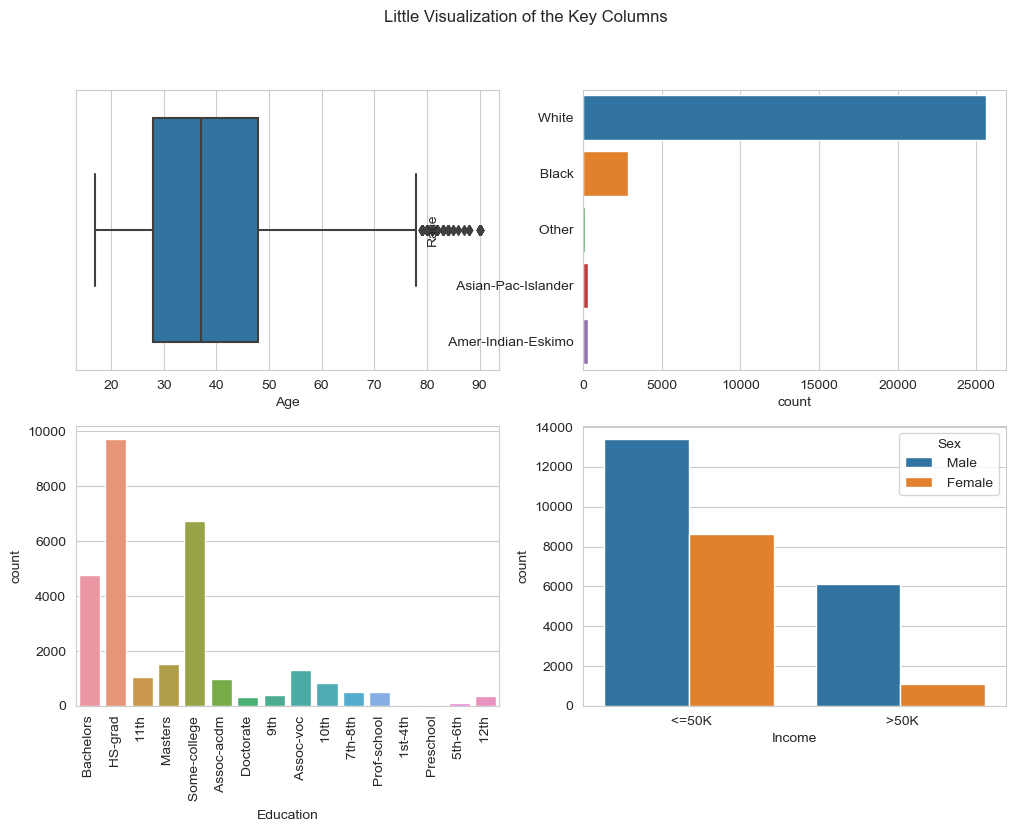

In [16]:
# View some important data summeries
sns.set_style('whitegrid')
fig, axs = plt.subplots(2,2, figsize = (12,8))
sns.boxplot(ax = axs[0,0], x = 'Age', data = df_us)
sns.countplot(ax = axs[0,1], y = 'Race', data = df_us)
sns.countplot(ax = axs[1,0], x = 'Education', data = df_us)
sns.countplot(ax = axs[1,1], x = 'Income', data = df_us, hue="Sex")
axs[1,0].tick_params(axis="x", rotation=90)
fig.suptitle('Little Visualization of the Key Columns')

In [45]:
df_us.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [56]:
df_us[df_us['Income'] == ' >50K']

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,>50K
19,43,Self-emp-not-inc,Masters,Divorced,Exec-managerial,Unmarried,White,Female,45,>50K
...,...,...,...,...,...,...,...,...,...,...
32539,71,?,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,10,>50K
32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,>50K
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K


Text(0.5, 1.03, 'Relationship between Hours per week and Age across Race')

<Figure size 640x480 with 0 Axes>

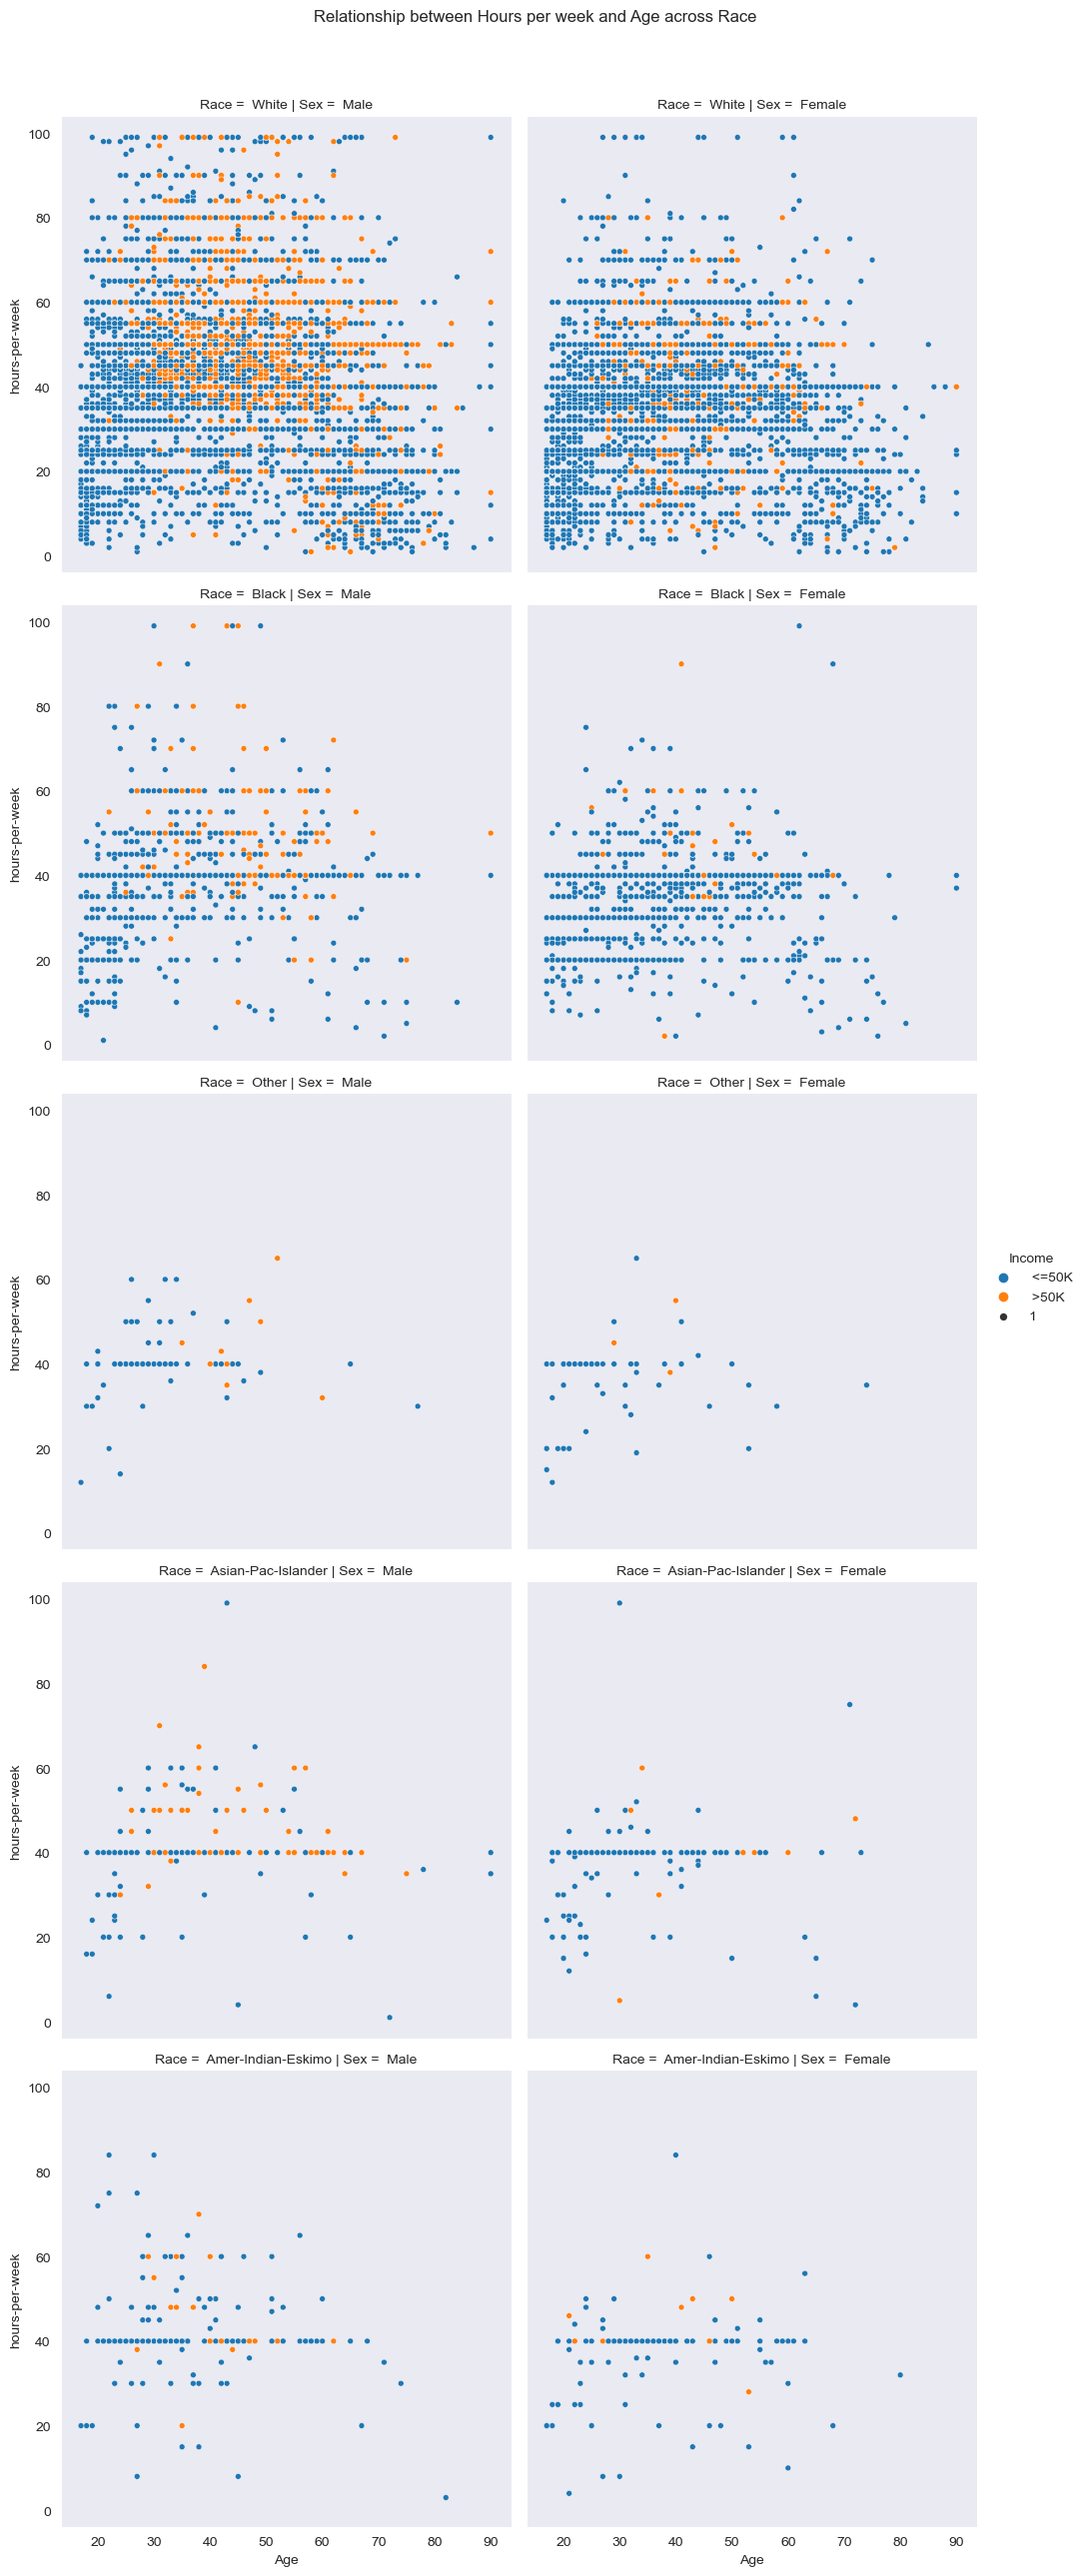

In [57]:
sns.set_style('dark')
plt.figure()
g =sns.relplot(x='Age', y='hours-per-week', data=df_us, kind='scatter', col='Sex', row='Race', hue='Income', size=1)
g.fig.suptitle('Relationship between Hours per week and Age across Race', y = 1.03)

In [22]:
df_us["Sex"].unique()

array([' Male', ' Female'], dtype=object)

In [58]:
df_us_low = df_us[df_us["Income"] == ' <=50K']
df_us_low

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32552,43,Private,Assoc-voc,Married-civ-spouse,Sales,Husband,White,Male,45,<=50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K


In [59]:
df_us_high = df_us[df_us["Income"] != ' <=50K']
df_us_high

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,>50K
19,43,Self-emp-not-inc,Masters,Divorced,Exec-managerial,Unmarried,White,Female,45,>50K
...,...,...,...,...,...,...,...,...,...,...
32539,71,?,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,10,>50K
32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,>50K
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K


In [60]:
# sample out some 7171 entries of the data for <=50k
# This is to ensure equall amount of each binary label to avoide bias 
df_us_low = df_us_low.sample(7171 , random_state=1)
df_us_low

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income
24032,30,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Farming-fishing,Husband,White,Male,60,<=50K
11207,65,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,<=50K
9926,73,?,11th,Married-civ-spouse,Unknown,Husband,White,Male,8,<=50K
11135,48,Local-gov,Masters,Divorced,Prof-specialty,Unmarried,White,Female,80,<=50K
27784,28,Private,Bachelors,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,15,<=50K
...,...,...,...,...,...,...,...,...,...,...
4259,32,Private,Some-college,Never-married,Other-service,Not-in-family,White,Male,50,<=50K
8186,21,Private,HS-grad,Separated,Machine-op-inspct,Other-relative,White,Male,40,<=50K
5498,43,Private,Bachelors,Divorced,Other-service,Not-in-family,White,Female,40,<=50K
25408,42,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,<=50K


In [61]:
# concatenate the two dataframes
df_us = pd.concat([df_us_high, df_us_low])
df_us

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,>50K
19,43,Self-emp-not-inc,Masters,Divorced,Exec-managerial,Unmarried,White,Female,45,>50K
...,...,...,...,...,...,...,...,...,...,...
4259,32,Private,Some-college,Never-married,Other-service,Not-in-family,White,Male,50,<=50K
8186,21,Private,HS-grad,Separated,Machine-op-inspct,Other-relative,White,Male,40,<=50K
5498,43,Private,Bachelors,Divorced,Other-service,Not-in-family,White,Female,40,<=50K
25408,42,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,<=50K


Text(0.5, 0.98, 'Little Visualization of the Key Columns')

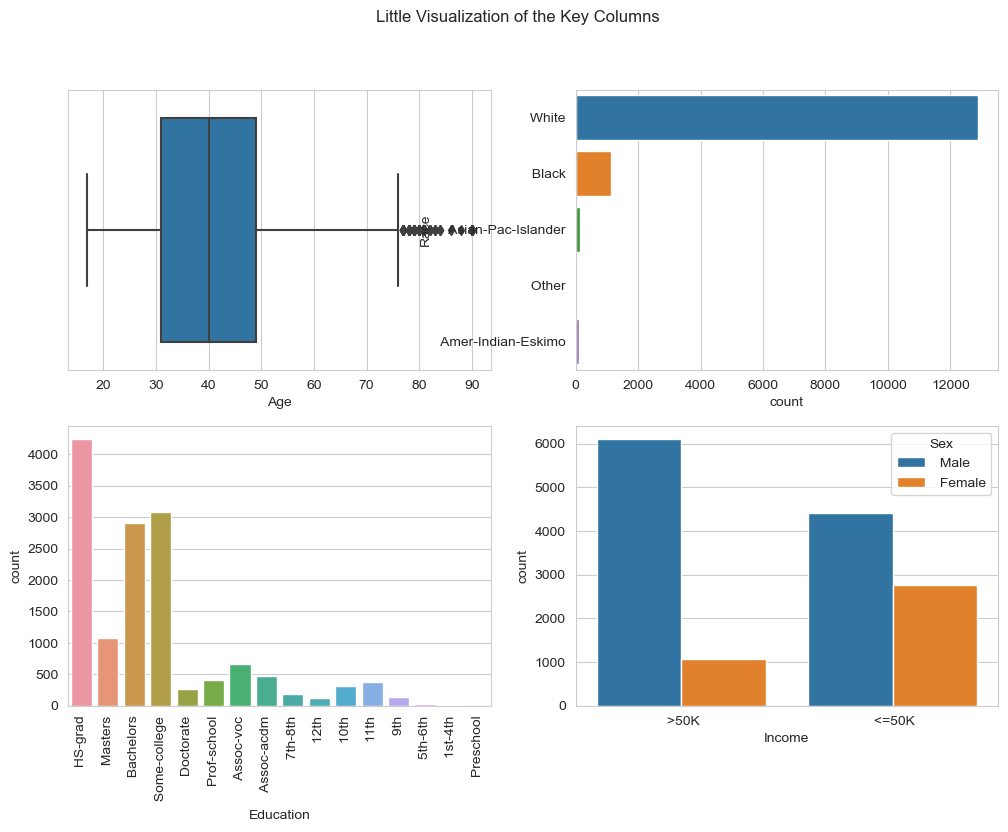

In [62]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(2,2, figsize = (12,8))
sns.boxplot(ax = axs[0,0], x = 'Age', data = df_us)
sns.countplot(ax = axs[0,1], y = 'Race', data = df_us)
sns.countplot(ax = axs[1,0], x = 'Education', data = df_us)
sns.countplot(ax = axs[1,1], x = 'Income', data = df_us, hue="Sex")
axs[1,0].tick_params(axis="x", rotation=90)
fig.suptitle('Little Visualization of the Key Columns')

In [63]:
# The "LabelEncoder()" is used to encode categorical variables to numerical values
le = LabelEncoder()

In [64]:
# Use the "LabelEncoder()" to get a transform of each categorical column
df_us['Workclass_label'] = le.fit_transform(df_us['Workclass'])
df_us['Education_label'] = le.fit_transform(df_us['Education'])
df_us['Marital Status_label'] = le.fit_transform(df_us['Marital Status'])
df_us['Occupation_label'] = le.fit_transform(df_us['Occupation'])
df_us['Relationship_label'] = le.fit_transform(df_us['Relationship'])
df_us['Race_label'] = le.fit_transform(df_us['Race'])
df_us['Sex_label'] = le.fit_transform(df_us['Sex'])
df_us['Income_label'] = le.fit_transform(df_us['Income'])
df_us

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,hours-per-week,Income,Workclass_label,Education_label,Marital Status_label,Occupation_label,Relationship_label,Race_label,Sex_label,Income_label
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,>50K,6,11,2,3,0,4,1,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,>50K,4,12,4,9,1,4,0,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K,4,9,2,3,0,4,1,1
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,>50K,4,15,2,3,0,2,1,1
19,43,Self-emp-not-inc,Masters,Divorced,Exec-managerial,Unmarried,White,Female,45,>50K,6,12,0,3,4,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,32,Private,Some-college,Never-married,Other-service,Not-in-family,White,Male,50,<=50K,4,15,4,7,1,4,1,0
8186,21,Private,HS-grad,Separated,Machine-op-inspct,Other-relative,White,Male,40,<=50K,4,11,5,6,2,4,1,0
5498,43,Private,Bachelors,Divorced,Other-service,Not-in-family,White,Female,40,<=50K,4,9,0,7,1,4,0,0
25408,42,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,<=50K,4,15,2,0,0,4,1,0


In [117]:
# Create dictionaries for each column encoding in order to be able to use it to transform new data making it ready to be fed into the model
lookup_Workclass_name = dict(zip(df_us.Workclass.unique(), df_us.Workclass_label.unique()))
lookup_Education_name = dict(zip(df_us.Education.unique(), df_us.Education_label.unique()))
lookup_Marital_Status_name = dict(zip(df_us['Marital Status'].unique(), df_us['Marital Status_label'].unique())) 
lookup_Occupation_name = dict(zip(df_us.Occupation.unique(), df_us.Occupation_label.unique()))
lookup_Relationship_name = dict(zip(df_us.Relationship.unique(), df_us.Relationship_label.unique()))
lookup_Race_name = dict(zip(df_us.Race.unique(), df_us.Race_label.unique())) 
lookup_Sex_name = dict(zip(df_us.Sex.unique(), df_us.Sex_label.unique()))
lookup_Income_name = dict(zip(df_us.Income.unique(), df_us.Income_label.unique()))
lookup_Income_name

AttributeError: 'DataFrame' object has no attribute 'Workclass'

In [116]:
lookup_Sex_name

{1: ' Male', 0: ' Female'}

In [66]:
# A list of all the columns to be droped
columns_to_drop = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Income']

In [67]:
# Drop the text object columns
df_us = df_us.drop(columns=columns_to_drop)
df_us

,Age,hours-per-week,Workclass_label,Education_label,Marital Status_label,Occupation_label,Relationship_label,Race_label,Sex_label,Income_label
7,52,45,6,11,2,3,0,4,1,1
8,31,50,4,12,4,9,1,4,0,1
9,42,40,4,9,2,3,0,4,1,1
10,37,80,4,15,2,3,0,2,1,1
19,43,45,6,12,0,3,4,4,0,1
...,...,...,...,...,...,...,...,...,...,...
4259,32,50,4,15,4,7,1,4,1,0
8186,21,40,4,11,5,6,2,4,1,0
5498,43,40,4,9,0,7,1,4,0,0
25408,42,40,4,15,2,0,0,4,1,0


Text(0.5, 1.0, 'Correlation among the variables')

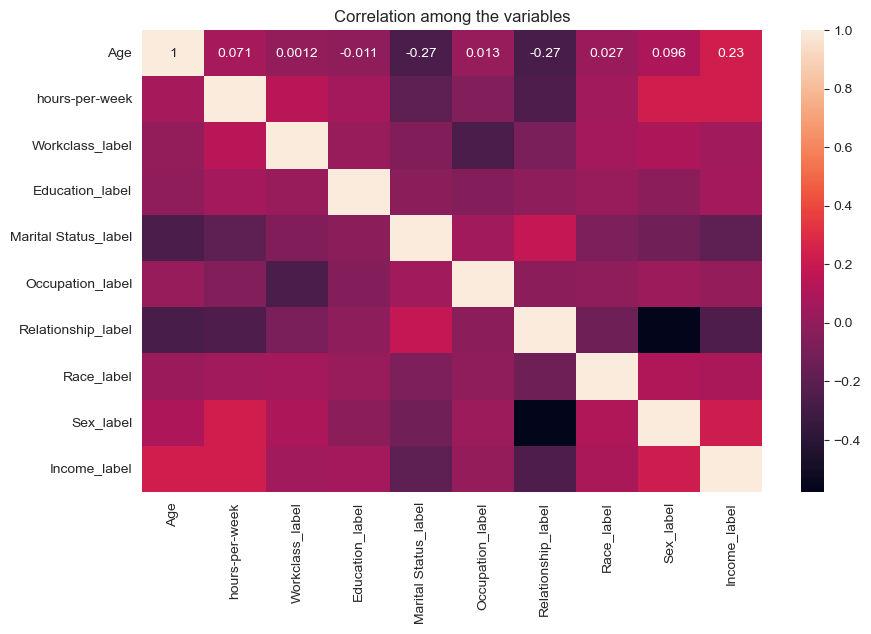

In [24]:
# A heatmap to show the correlation between the columns
plt.figure(figsize=(10,6))
sns.heatmap(df_us.corr(), annot=True).set_title('Correlation among the variables')

Text(0.5, 1.0, 'Correlation among the variables')

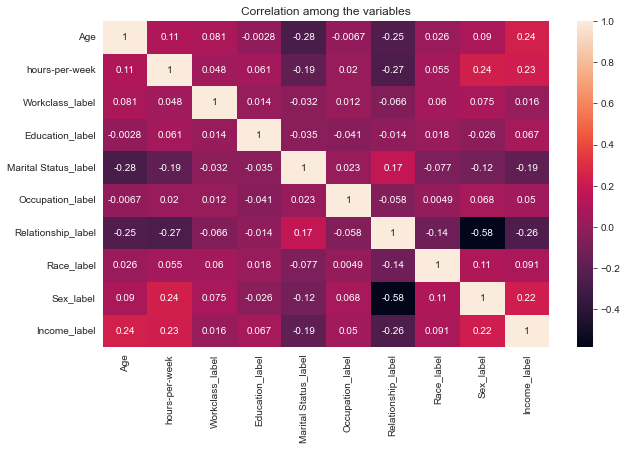

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df_us.corr(), annot=True).set_title('Correlation among the variables')

In [68]:
# Extract the features from the dataset as the independent variable
X = df_us.drop(columns=['Income_label']).values
X

array([[52, 45,  6, ...,  0,  4,  1],
       [31, 50,  4, ...,  1,  4,  0],
       [42, 40,  4, ...,  0,  4,  1],
       ...,
       [43, 40,  4, ...,  1,  4,  0],
       [42, 40,  4, ...,  0,  4,  1],
       [63, 20,  4, ...,  5,  1,  0]], dtype=int64)

In [69]:
# Extract the label from the dataset as the dependent variable
y = df_us[['Income_label']].values
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [70]:
# Split dataset for test & train 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

## Design Goal
This model is mainly interested in accuracy, hence the model eveluation is based on its accuracy.

### Select optimal hyperparameters to give best accuracy for the selected models

In [71]:
# List of models to be tuned
models_list = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

In [72]:
# The parameters of each model to be selected from
model_hyperparameters = {
    
    'KNN_hyp' : {
        'n_neighbors' : [10,12,14]
    },
    'dec_tree_hyp' : {
        'max_depth' : [6,8,9],
    },
#     'svc_hyp' : {
#         'C' : [5,10,20,50,100],
#         'gamma': [0.10, 1.00,10.00,20.00]
#     }
#     ,
    'random_forest_hyp' : {
        'n_estimators' : [ 700,750],
        'max_features' : [2,3]
    }
}

In [73]:
# List of all keys from the model hyperparameters
model_keys= list(model_hyperparameters.keys())
print(model_keys)

['KNN_hyp', 'dec_tree_hyp', 'random_forest_hyp']


In [31]:

def model_selection(list_of_models,hyperparametrs_dictionary):
    """
    Model selection for hyperparameter

    Args:
        list_of_models (_type_): list of the models
        hyperparametrs_dictionary (_type_): hyperparameter keys

    Returns:
        dataframe: the best performing parameters of each model and their accuracy score
    """
    result = []
    i = 0
    
    for model in list_of_models:
        key = model_keys[i]
        params = hyperparametrs_dictionary[key]
        i+=1
        
        print(model)
        print(params)
        print('---------------------------------------------')
        
        classifier = GridSearchCV(model, params, cv=5)
        
        # fitting the data to classifier
        
        classifier.fit(X,y.ravel())
        result.append({
            'model used': model,
            'highest score' : classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })
        
    result_dataframe = pd.DataFrame(result, columns=['model used', 'highest score', 'best hyperparameters'])

    return result_dataframe

In [74]:
model_selection(models_list, model_hyperparameters)

KNeighborsClassifier()
{'n_neighbors': [10, 12, 14]}
---------------------------------------------
DecisionTreeClassifier()
{'max_depth': [6, 8, 9]}
---------------------------------------------
RandomForestClassifier()
{'n_estimators': [700, 750], 'max_features': [2, 3]}
---------------------------------------------


,model used,highest score,best hyperparameters
0,KNeighborsClassifier(),0.750662,{'n_neighbors': 10}
1,DecisionTreeClassifier(),0.795774,{'max_depth': 8}
2,RandomForestClassifier(),0.788314,"{'max_features': 2, 'n_estimators': 750}"


## USING KNEIGHBORS CLASSIFIER

In [75]:
knc = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train.ravel())

In [76]:
knc_pred = knc.predict(X_test)

In [77]:
print('R-squared test score: {:.3f}'
     .format(knc.score(X_test, y_test)))

R-squared test score: 0.755


In [78]:
print('R-squared test score: {:.3f}'
     .format(knc.score(X_train, y_train)))

R-squared test score: 0.791


In [79]:
cv_scores = cross_val_score(knc,X_train, y_train.ravel())

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.73234201 0.72803347 0.74802417 0.75174338 0.74895397]
Mean cross-validation score (3-fold): 0.742


## Dummy Classifier result

In [80]:
# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [81]:
dummy_majority.score(X_test, y_test)

0.49219185722253206

In [82]:
dummy_majority.score(X_test, y_test)

0.49219185722253206

In [83]:
y_majority_predicted = dummy_majority.predict(X_test)
dum_confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', dum_confusion)

Most frequent class (dummy classifier)
 [[   0 1821]
 [   0 1765]]


### KNEIGHBORS Evaluation

In [84]:
knc_confusion = confusion_matrix(y_test, knc_pred)

print('KNN Classifier result \n', knc_confusion)

KNN Classifier result 
 [[1289  532]
 [ 346 1419]]


In [85]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, knc_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, knc_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, knc_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, knc_pred)))

Accuracy: 0.76
Precision: 0.73
Recall: 0.80
F1: 0.76


## Decision tree classification

In [86]:
dtc = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train.ravel())

In [87]:
dtc_predicted = dtc.predict(X_test)

### Decision tree evaluation

In [88]:
dtc_confusion = confusion_matrix(y_test, dtc_predicted)

print('Decission tree classifier (max_dept : 8)\n', dtc_confusion)
dtc.score(X_test, y_test)

Decission tree classifier (max_dept : 8)
 [[1278  543]
 [ 210 1555]]


0.7900167317345231

In [89]:
pred_train = dtc.predict(X_train)
dtc_confusion = confusion_matrix(y_train, pred_train)
print('Decission tree classifier (max_dept : 8)\n', dtc_confusion)
dtc.score(X_train, y_train)

Decission tree classifier (max_dept : 8)
 [[3908 1442]
 [ 493 4913]]


0.8201004090740052

## Random forest classification

In [90]:
rfc = RandomForestClassifier(n_estimators = 700).fit(X_train, y_train.ravel())

In [91]:
rfc_predicted = rfc.predict(X_test)

### Random forest Evaluation

In [92]:
rfc_confusion = confusion_matrix(y_test, rfc_predicted)

print('Random forest classifier (n_estimator : 700)\n', rfc_confusion)
rfc.score(X_test, y_test)

Random forest classifier (n_estimator : 700)
 [[1427  394]
 [ 371 1394]]


0.786670384829894

In [93]:
pred_train = rfc.predict(X_train)
rfc_confusion = confusion_matrix(y_train, pred_train)
print('Random forest classifier (n_estimators : 1000)\n', rfc_confusion)
rfc.score(X_train, y_train)

Random forest classifier (n_estimators : 1000)
 [[5129  221]
 [  73 5333]]


0.9726664187430272

In [ ]:
import pandas as pd

# Example label encoding dictionaries for each column
label_encoding_dicts = {
    'column1': {'cat': 0, 'dog': 1, 'bird': 2},
    'column2': {'red': 0, 'blue': 1, 'green': 2}
    # Add more columns and dictionaries as needed
}

# Your new data DataFrame
new_data = pd.DataFrame({
    'column1': ['dog', 'cat', 'bird', 'dog'],
    'column2': ['red', 'blue', 'green', 'red']
    # Add more columns as needed
})

def apply_label_encoding(data, column, encoding_dict):
    return data[column].map(encoding_dict)

# Apply label encoding to each categorical column
for column, encoding_dict in label_encoding_dicts.items():
    new_data[column] = apply_label_encoding(new_data, column, encoding_dict)

print(new_data)


#### The random forrest model overfit the model

## USING VOTING ENSEMBLE TO GET THE BEST MODEL 

In [94]:
estimators = [("decision",dtc),("KNeighbors", knc)]

In [95]:
vc = VotingClassifier(estimators=estimators, voting="soft")

In [96]:
vc.fit(X_train, y_train.ravel())

VotingClassifier(estimators=[('decision', DecisionTreeClassifier(max_depth=8)),
                             ('KNeighbors',
                              KNeighborsClassifier(n_neighbors=10))],
                 voting='soft')

In [97]:
vc_pred = vc.predict(X_test)
vc_pred

array([1, 0, 1, ..., 0, 0, 1])

In [98]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF VOTING CLASSIFIER
print(classification_report(y_test,vc_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.77      1821
           1       0.75      0.86      0.80      1765

    accuracy                           0.79      3586
   macro avg       0.80      0.79      0.79      3586
weighted avg       0.80      0.79      0.79      3586



## USING BAGGING ENSEMBLE

In [99]:
bc = BaggingClassifier(base_estimator = dtc, n_estimators=100).fit(X_train, y_train.ravel())

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [100]:
bc_pred = bc.predict(X_test)

In [101]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF BAGGING CLASSIFIER
print(classification_report(y_test,bc_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1821
           1       0.77      0.86      0.81      1765

    accuracy                           0.81      3586
   macro avg       0.81      0.81      0.81      3586
weighted avg       0.81      0.81      0.80      3586



## USING STACKING ENSEMBLE

In [102]:
sc = StackingClassifier(estimators=estimators, final_estimator = dtc).fit(X_train, y_train.ravel())

In [103]:
sc_pred = sc.predict(X_test)
sc_pred

array([1, 0, 1, ..., 0, 0, 1])

In [104]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF STACKING CLASSIFIER
print(classification_report(y_test,sc_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1821
           1       0.76      0.83      0.80      1765

    accuracy                           0.79      3586
   macro avg       0.79      0.79      0.79      3586
weighted avg       0.79      0.79      0.79      3586



## USING GRADIENT BOOSTING CLASSIFIER

In [105]:
gbc = GradientBoostingClassifier(n_estimators=100)

In [106]:
gbc.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [107]:
gbc_pred = gbc.predict(X_test)
gbc_pred

array([1, 0, 1, ..., 0, 0, 1])

In [108]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF GRADIENT BOOSTING CLASSIFIER
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1821
           1       0.79      0.85      0.82      1765

    accuracy                           0.81      3586
   macro avg       0.81      0.81      0.81      3586
weighted avg       0.81      0.81      0.81      3586



## USING VOTING ENSEMBLE TO GET THE BEST MODEL

In [109]:
estimators = [("Voting", vc), ("Bagging", bc), ("Stacking", sc), ("Gradient", gbc)]

In [110]:
vc = VotingClassifier(estimators=estimators, voting="hard")

In [111]:
vc.fit(X_train, y_train.ravel())

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('Voting',
                              VotingClassifier(estimators=[('decision',
                                                            DecisionTreeClassifier(max_depth=8)),
                                                           ('KNeighbors',
                                                            KNeighborsClassifier(n_neighbors=10))],
                                               voting='soft')),
                             ('Bagging',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                                                n_estimators=100)),
                             ('Stacking',
                              StackingClassifier(estimators=[('decision',
                                                              DecisionTreeClassifier(max_depth=8)),
                                                             ('KNeighbors',
                                                              KNeighborsClassifier(n_neighbors=10))],
                                                 final_estimator=DecisionTreeClassifier(max_depth=8))),
                             ('Gradient', GradientBoostingClassifier())])

In [112]:
final_pred = vc.predict(X_test)
final_pred

array([1, 0, 1, ..., 0, 0, 1])

In [113]:
# USING CLASSIFICATION REPORT TO TEST ACCURACY OF VOTING CLASSIFIER
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1821
           1       0.78      0.83      0.81      1765

    accuracy                           0.80      3586
   macro avg       0.81      0.80      0.80      3586
weighted avg       0.81      0.80      0.80      3586

